<a href="https://colab.research.google.com/github/PorusSuntoke/TensorFlow-Projects/blob/master/Revenue_Predictions_of_ice_cream_business_based_on_air_temperatures_outside.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP #0: IMPORT LIBRARIES

In [1]:
!pip install tensorflow-gpu==2.0.0.alpha0
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


STEP #1: IMPORT DATASET

In [0]:
sales_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sales_Data.csv')

In [7]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [8]:
sales_df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [9]:
sales_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [10]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [11]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


STEP #2: VISUALIZE DATASET

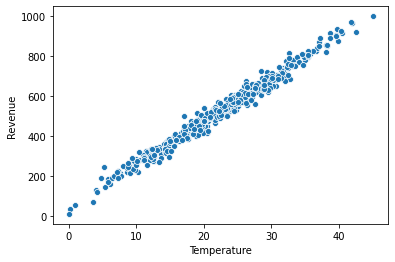

In [12]:
sns.scatterplot(sales_df['Temperature'], sales_df['Revenue'])

STEP #3: CREATE TRAINING AND TESTING SET

In [0]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

STEP #4: BUILD AND TRAIN THE MODEL

In [14]:
X_train.shape

(500,)

In [16]:
y_train.shape

(500,)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.9), loss = 'mean_squared_error')

In [28]:
epochs_hist = model.fit(X_train, y_train, epochs = 1000)

Train on 500 samples
Epoch 1/1000
500/500 [==============================] - 0s 179us/sample - loss: 723.8556
Epoch 2/1000
500/500 [==============================] - 0s 36us/sample - loss: 631.2865
Epoch 3/1000
500/500 [==============================] - 0s 37us/sample - loss: 640.0163
Epoch 4/1000
500/500 [==============================] - 0s 35us/sample - loss: 656.0181
Epoch 5/1000
500/500 [==============================] - 0s 36us/sample - loss: 658.9273
Epoch 6/1000
500/500 [==============================] - 0s 35us/sample - loss: 633.2838
Epoch 7/1000
500/500 [==============================] - 0s 37us/sample - loss: 670.8216
Epoch 8/1000
500/500 [==============================] - 0s 40us/sample - loss: 641.6791
Epoch 9/1000
500/500 [==============================] - 0s 38us/sample - loss: 664.9182
Epoch 10/1000
500/500 [==============================] - 0s 40us/sample - loss: 665.6002
Epoch 11/1000
500/500 [==============================] - 0s 38us/sample - loss: 692.6758
Epoch 12

STEP #5: EVALUATE THE MODEL

In [25]:
epochs_hist.history.keys()

dict_keys(['loss'])

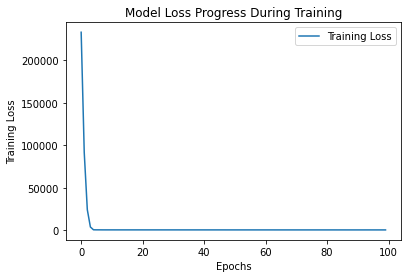

In [26]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [29]:
model.get_weights()

[array([[21.344334]], dtype=float32), array([44.41672], dtype=float32)]

In [44]:
Temperature_outside = 40
Revenue = model.predict([Temperature_outside])
print('Revenue Predictions using Trained ANN =', Revenue) 

Revenue Predictions using Trained ANN = [[898.19006]]


Text(0.5, 1.0, 'Revenue generated vs temperature at ice-cream stand')

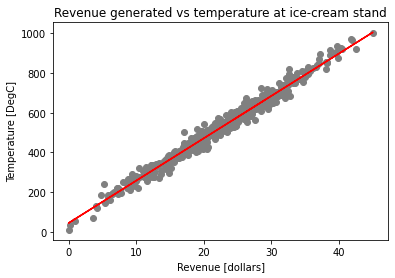

In [45]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.xlabel('Revenue [dollars]')
plt.ylabel('Temperature [DegC]')
plt.title('Revenue generated vs temperature at ice-cream stand')

STEP #6: VERIFY USING REGRESSION KIT IN SCIKIT LEARN!

In [0]:
X_train = X_train.values.reshape(-1,1)

In [48]:
X_train.shape

(500, 1)

In [0]:
y_train = y_train.values.reshape(-1,1)

In [50]:
y_train.shape

(500, 1)

In [58]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept = True)   # To force the line to pass through origin, we change fit_intercept from True to False.

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print('Linear Model Coefficient(m)', regressor.coef_)
print('Linear Model Coefficient(b)', regressor.intercept_)

Linear Model Coefficient(m) [[21.44362551]]
Linear Model Coefficient(b) [44.83126709]


Text(0.5, 1.0, 'Revenue generated vs temperature at ice-cream stand')

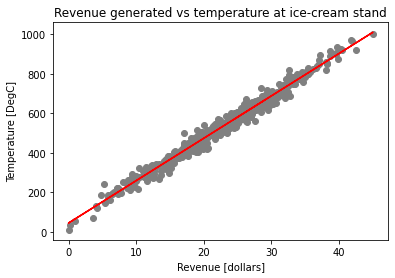

In [60]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.xlabel('Revenue [dollars]')
plt.ylabel('Temperature [DegC]')
plt.title('Revenue generated vs temperature at ice-cream stand')